<h1>Rotulação de Dados</h1>

Neste notebook é criado labels para os dados.

<h4>Rotulação de Tipo de Superfície</h4>

<table>
     <tr>
         <th>Valor</th>
         <th>Tipo</th>
         <th>Especificação</th>
     </tr>
     <tr>
         <td>0,1</td>
         <td>Sem Pavimento</td>
         <td>Terra</td>
     </tr>
     <tr>
         <td>0,1</td>
         <td>Pavimento Flexível</td>
         <td>Paralelepípedo/Hexagonal</td>
     </tr>
     <tr>
         <td>0,1</td>
         <td>Pavimento Rígido</td>
         <td>Asfalto</td>
     </tr>
</table>


<h4>Importação de Pacotes</h4>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import parser
# %matplotlib inline
%matplotlib notebook
pd.set_option("float_format", '{:0.10f}'.format)
pd.set_option('display.max_columns', 30)
%run "3 - Data Labeling.py"

<h4>Funções Utilitárias</h4>

In [13]:
# Transforma Date String em Timestamp Int
def parseDateToTimestamp(value):
    newDate = parser.parse(value)
    return datetime.timestamp(newDate)

# Transforma Timestamp Int em Date String 
def parseTimestampToDate(value):
    newDate = datetime.fromtimestamp(value)
    return newDate.strftime("%Y-%m-%dT%H:%M:%S")

# Transforma Array Tupla de Date para Array Tupla de Timestamp
def parseDateToTimestampTuple(values):
    
    result = []

    for i in values:
        x = parseDateToTimestamp(i[0])
        y = parseDateToTimestamp(i[1])
        result.append((x,y))

    return result

# Rotula cada amostra com base nos labels e timestamp
def mapToLabel(timestamp, ranges):
    
    for interval in ranges:
        
        if(timestamp >= interval[0] and timestamp <= interval[1]):
            return 1
        
    return 0

# Adiciona uma classe de dado como coluna no dataset
def addClassToData(data_mpu, timestamp_ranges, class_name):
    timestamps = data_mpu['timestamp'].copy()
    class_values = timestamps.apply(mapToLabel, args=(timestamp_ranges,))
    data_mpu.insert(len(data_mpu.columns), class_name, class_values, True)
    
# Método principal 
def processLabels(data_mpu, ranges_date, side):
    
    sem_pavimento = parseDateToTimestampTuple(ranges_date['sem_pavimento'])
    addClassToData(data_mpu, sem_pavimento, 'land')
    
    pavimento_flexivel = parseDateToTimestampTuple(ranges_date['pavimento_flexivel'])
    addClassToData(data_mpu, pavimento_flexivel, 'cobblestone')
    
    pavimento_rigido = parseDateToTimestampTuple(ranges_date['pavimento_rigido'])
    addClassToData(data_mpu, pavimento_rigido, 'asphalt')
    
#     file = os.path.join(folder, 'dataset_gps_mpu_' + side + '_labeled.csv')
#     data_direita.to_csv(file, index=False)
#     print("Salvo em ", file)

    return data_mpu

# Plot dados com classes
def plotClasses(data):
    
    plt.figure(figsize=(16,6)) 
    data['acc_z_below_suspension'].rolling(5).std().plot(color="y")
    # data['gyro_y_below_suspension'].plot()
    # data['gyro_x_below_suspension'].plot()
    (data['speed'] * 3.6).plot()
    (data['land'] * 20).plot(linewidth=2)
    (data['cobblestone'] * 40).plot(linewidth=2)
    (data['asphalt'] * 60).plot(linewidth=2)
    plt.legend()

<h4>Importação dos Dados</h4>

In [3]:
settings = workspace['settings']
dataset = workspace['datasets']['saveiro-3']

folder = os.path.join(settings['folder'], dataset['folder'])
data_esquerda = pd.read_csv(os.path.join(folder, 'dataset_gps_mpu_left.csv'), float_precision="high")
data_direita = pd.read_csv(os.path.join(folder, 'dataset_gps_mpu_right.csv'), float_precision="high")

<h4>Rotulação de Dados</h4>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


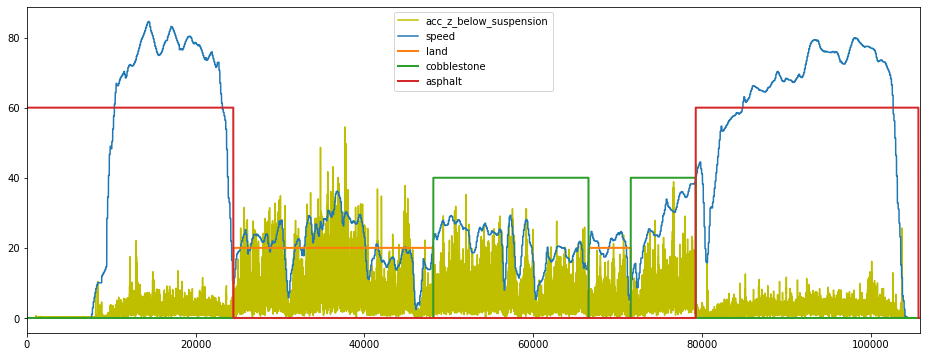

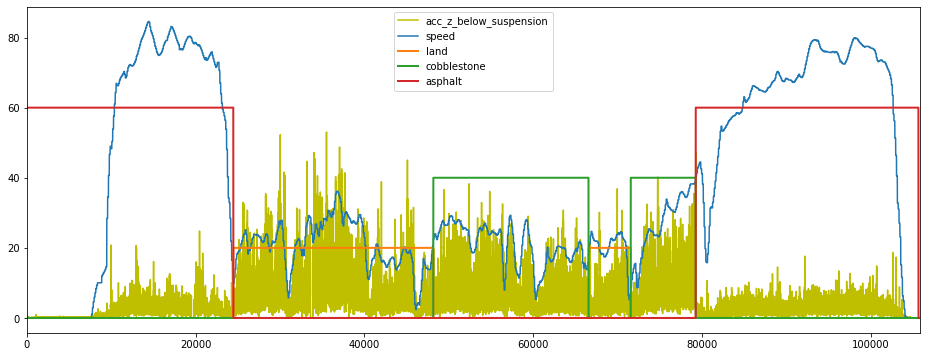

In [14]:
data_esquerda_labeled = processLabels(data_esquerda.copy(), dataset.copy(), 'left')
plotClasses(data_esquerda_labeled)

data_direita_labeled = processLabels(data_direita.copy(), dataset.copy(), 'right')
plotClasses(data_direita_labeled)